In [275]:
#Telecharger la structure de bande du materiau mp-1115 (PtSe2)
from pymatgen.ext.matproj import MPRester

with MPRester("NLKe1dAg7yznVObH") as m:
    # Create a structure for material id mp-1115 (PtSe2)
    bstructure = m.get_bandstructure_by_material_id("mp-1115")



In [276]:
## bande interdite:
print("La bande interdite:")
gap= bstructure.get_band_gap()
print("Est-elle directe? "+str(gap.get('direct')))
print("Energie de la bande interdite: " + str(gap.get('energy'))+"eV")
print("La bande interdite étant indirecte, cela implique que le maximum de bande de valence (VBM) \n et le minimum de bande de conduction (CBM) n'ont pas le même vecteur d'onde.")
print("Coordonnées fractionnelles des kpoints correspondant au VBM et CBM:")
print(gap.get('transition'))


La bande interdite:
Est-elle directe? False
Energie de la bande interdite: 0.8273999999999999eV
La bande interdite étant indirecte, cela implique que le maximum de bande de valence (VBM) 
 et le minimum de bande de conduction (CBM) n'ont pas le même vecteur d'onde.
Coordonnées fractionnelles des kpoints correspondant au VBM et CBM:
(0.087,0.087,0.000)-(0.261,0.261,0.000)


In [277]:
vbm = bstructure.get_vbm()
print("La bande de valence:")
print("La dernière bande de valence est la 10e bande. Le VBM s'y trouve à l'indice de kpoint "+ 
      str(vbm.get('kpoint_index')) +"\n et a une énergie de " + str(vbm.get('energy'))+"eV.")

cbm = bstructure.get_cbm()
print("\nLa bande de conduction:")
print("La première bande de conduction est la 11e bande. Le CBM s'y trouve à l'indice de kpoint "+ 
      str(cbm.get('kpoint_index')) +"\n et a une énergie de " + str(cbm.get('energy'))+"eV.")

La bande de valence:
La dernière bande de valence est la 10e bande. Le VBM s'y trouve à l'indice de kpoint [51]
 et a une énergie de 3.0846eV.

La bande de conduction:
La première bande de conduction est la 11e bande. Le CBM s'y trouve à l'indice de kpoint [39]
 et a une énergie de 3.912eV.


In [278]:
from pymatgen.electronic_structure import plotter
bsplot = plotter.BSPlotter(bstructure)
data = bsplot.bs_plot_data()
distances = data.get('distances')
energy = data.get('energy')

In [279]:
#On a 9 branches:
#\\Gamma-M: 0-20
#M-K 21-33
#K-\\Gamma 34-57
#\\Gamma-A 58-69
#A-L 70-90
#L-H 91-103
#H-A 104-127
#L-M 128-139
#K-H 140-151
#
#Trouver la direction dans laquelle il y a le plus de dispersion: là où la pente est max
#Trouver la direction dans laquelle il y a le moins de dispersion: là où la pente est min
import numpy as np
import matplotlib.pyplot as plt

#petite fonction pour calculer les pentes
def pente (x1, x2, y1, y2):
    return (y2-y1)/(x2-x1)

print("Dans la bande de valence:")
pentesV = np.zeros(9)
for i in range(9):
    #print("Pente de la "+str(i+1)+"e branche de la bande de valence:")
    a = pente (distances[i][0],distances[i][-1],energy[i].get('1')[10][0],energy[i].get('1')[10][-1])
    pentesV[i] = abs(a)
    #print(a)
print("La pente la plus faible de valeur absolue " + str(min(pentesV)) +' se trouve dans la ' + str(np.where(pentesV== np.min(pentesV))[0][0] +1)+ 'e branche')
print("La direction dans laquelle la dernière bande de valence présente le moins de dispersion est la direction L-H")
print("La pente la plus forte de valeur absolue " + str(max(pentesV)) +' se trouve dans la ' + str(np.where(pentesV== np.max(pentesV))[0][0] +1)+ 'e branche')
print("La direction dans laquelle la dernière bande de valence présente le plus de dispersion est la direction \\Gamma-M")


print("\nDans la bande de conduction:")
pentesC = np.zeros(9)
for i in range(9):
    #print("Pente de la "+str(i+1)+"e branche de la bande de conduction:")
    a = pente (distances[i][0],distances[i][-1],energy[i].get('1')[11][0],energy[i].get('1')[11][-1])
    pentesC[i] = abs(a)
    #print(a)
print("La pente la plus faible de valeur absolue " + str(min(pentesC)) +' se trouve dans la ' + str(np.where(pentesC== np.min(pentesC))[0][0] +1)+ 'e branche')
print("La direction dans laquelle la première bande de conduction présente le moins de dispersion est la direction \\Gamma-A")
print("La pente la plus forte de valeur absolue " + str(max(pentesC)) +' se trouve dans la ' + str(np.where(pentesC== np.max(pentesC))[0][0] +1)+ 'e branche')
print("La direction dans laquelle la première bande de conduction présente le plus de dispersion est la direction K-H")


Dans la bande de valence:
La pente la plus faible de valeur absolue 0.30617656471295474 se trouve dans la 6e branche
La direction dans laquelle la dernière bande de valence présente le moins de dispersion est la direction L-H
La pente la plus forte de valeur absolue 2.159510430973818 se trouve dans la 1e branche
La direction dans laquelle la dernière bande de valence présente le plus de dispersion est la direction \Gamma-M

Dans la bande de conduction:
La pente la plus faible de valeur absolue 0.2858798838142661 se trouve dans la 4e branche
La direction dans laquelle la première bande de conduction présente le moins de dispersion est la direction \Gamma-A
La pente la plus forte de valeur absolue 1.4385522491389473 se trouve dans la 9e branche
La direction dans laquelle la première bande de conduction présente le plus de dispersion est la direction K-H


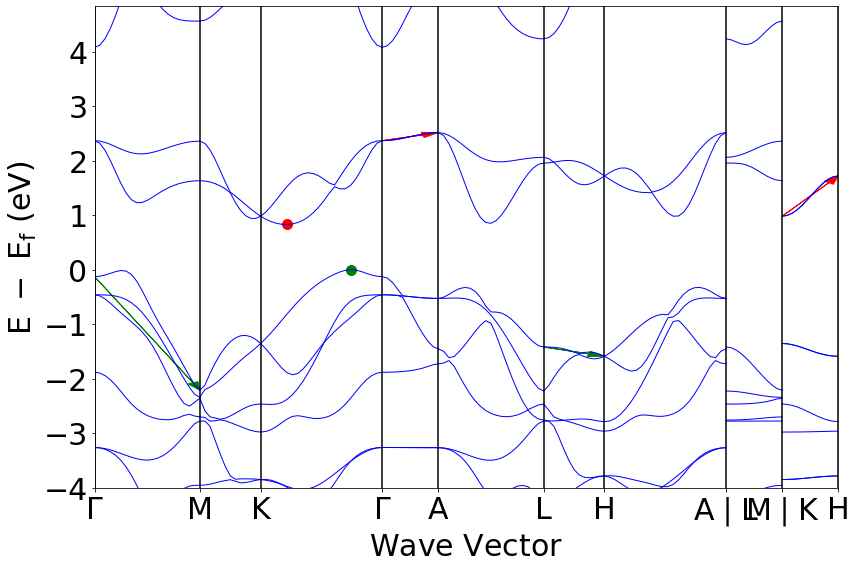

In [280]:
#from pymatgen.electronic_structure import plotter
#bsplot = plotter.BSPlotter(bstructure)
#print(bsplot.bs_plot_data)
bsplot.get_plot(vbm_cbm_marker=True)
#min dispersion BV:
x1,x2,y1,y2=distances[5][0],distances[5][-1],energy[5].get('1')[10][0],energy[5].get('1')[10][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'g')
#max dispersion BV:
x1,x2,y1,y2=distances[0][0],distances[0][-1],energy[0].get('1')[10][0],energy[0].get('1')[10][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'g')

#min dispersion BC:
x1,x2,y1,y2=distances[3][0],distances[3][-1],energy[3].get('1')[11][0],energy[3].get('1')[11][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'r')
#max dispersion BV:
x1,x2,y1,y2=distances[8][0],distances[8][-1],energy[8].get('1')[11][0],energy[8].get('1')[11][-1]
plt.arrow(x1,y1, x2-x1,y2-y1, length_includes_head=True, head_width=0.1, color = 'r')

#bsplot.show()
#bsplot.get_ticks()

In [281]:
print("Masse effective:")
print("Par définition, la masse effective m_eff = (h bar)^2 / (dérivée seconde de E par rapport à k)")
print("Comme nous cherchons m_eff en minimum et maximum de bande, nous pouvons utiliser l'approximation suivante:")
print("E(k) - E-0 = +- (h_bar)^2 / (2*m_eff) * ((k_1)^2+(k_2)^2+(k_3)^2)")
print("et donc \n m_eff = (h_bar)^2 / (2*\Delta E) * ((k_1)^2+(k_2)^2+(k_3)^2) \n")

h_bar = 6.582119569 * 10**(-16) # en eV*s
#bande de conduction:
kc = cbm.get('kpoint').frac_coords
ec = cbm.get('energy')
k2c = kc[0] * kc[0] + kc[1] * kc[1] + kc[2]*kc[2]
m_effC = h_bar*h_bar /(2*ec)*k2c
print("La masse effective du maximum de la première bande de conduction est de " +str(m_effC) + "kg.")

kv = vbm.get('kpoint').frac_coords
ev = vbm.get('energy')
k2v = kv[0] * kv[0] + kv[1] * kv[1] + kv[2]*kv[2]
m_effV = h_bar*h_bar /(2*ev)*k2v
print("La masse effective du maximum de la dernière bande de valence est de " +str(m_effV) + "kg.")



Masse effective:
Par définition, la masse effective m_eff = (h bar)^2 / (dérivée seconde de E par rapport à k)
Comme nous cherchons m_eff en minimum et maximum de bande, nous pouvons utiliser l'approximation suivante:
E(k) - E-0 = +- (h_bar)^2 / (2*m_eff) * ((k_1)^2+(k_2)^2+(k_3)^2)
et donc 
 m_eff = (h_bar)^2 / (2*\Delta E) * ((k_1)^2+(k_2)^2+(k_3)^2) 

La masse effective du maximum de la première bande de conduction est de 7.536670580416287e-33kg.
La masse effective du maximum de la dernière bande de valence est de 1.0620304829796176e-33kg.
